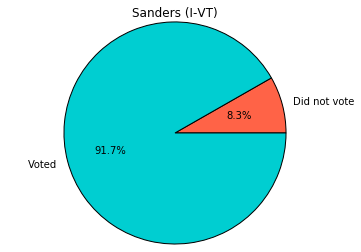

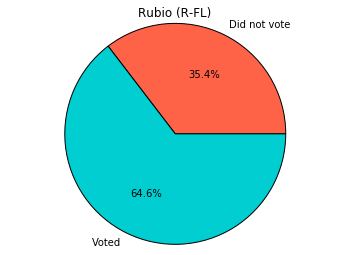

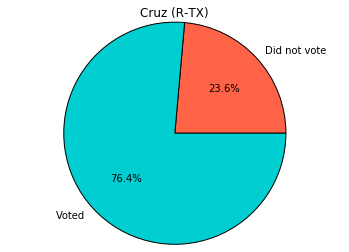

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator
from os import listdir

%matplotlib inline

df = pd.read_csv('../data/rollCallVotes_cleaned.csv')

senators = df.ix[:,0:100]

percent_missed_votes = {}
for i in range(0, 100):
    indiv_senator = senators.ix[:, i]
    no_missed = len(indiv_senator[indiv_senator == 'Not Voting'])
    no_total = len(indiv_senator)
    percent_missed_votes[indiv_senator.name] = float(no_missed)/no_total

    
candidates = ['Sanders (I-VT)', 'Rubio (R-FL)', 'Cruz (R-TX)']
labels = 'Did not vote', 'Voted'
colors = ['tomato', 'darkturquoise']

for candidate in candidates:    
    plt.pie([percent_missed_votes[candidate]*100, 100 - percent_missed_votes[candidate]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(candidate)
    plt.show()

In [3]:
sorted_missed_votes = sorted(percent_missed_votes.items(), key=operator.itemgetter(1))[::-1]
for i in range(0, 10):
    print str(sorted_missed_votes[i][0]) + ' missed', str(sorted_missed_votes[i][1]*100)[0:5] + ' percent of votes'

Rubio (R-FL) missed 35.39 percent of votes
Graham (R-SC) missed 28.31 percent of votes
Cruz (R-TX) missed 23.59 percent of votes
Vitter (R-LA) missed 16.81 percent of votes
Reid (D-NV) missed 16.51 percent of votes
Boxer (D-CA) missed 10.91 percent of votes
Sanders (I-VT) missed 8.259 percent of votes
Nelson (D-FL) missed 7.079 percent of votes
Kirk (R-IL) missed 6.489 percent of votes
Lee (R-UT) missed 5.899 percent of votes


In [4]:
senators = ['Warren (D-MA)', 'Markey (D-MA)', 'Sullivan (R-AK)', 'Peters (D-MI)']
subjects = ['Alternative and renewable resources', 'Health care costs and insurance', 'Refugees, asylum, displaced persons']
percent_voted_yea = np.zeros((len(subjects), len(senators)))

def votes_on_subject(senator, subject):
    subject_df = df[df[subject] == 1]
    senator_subject = subject_df[senator]
    yeas = len(senator_subject[senator_subject == 'Yea'])
    nays = len(senator_subject[senator_subject == 'Nay'])
    percent_voted_yea = float(yeas) / (yeas + nays)
    return percent_voted_yea

for i in range(0, len(subjects)):
    for j in range(0, len(senators)):
        percent_voted_yea[i, j] = votes_on_subject(senators[j], subjects[i])

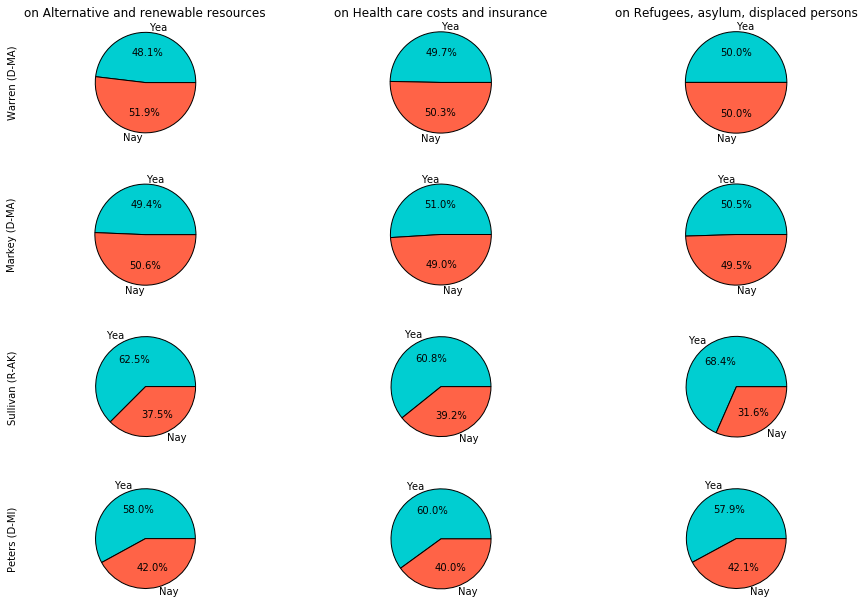

In [6]:
labels = 'Yea', 'Nay'
colors = ['darkturquoise', 'tomato']


fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.5)

#Warren
plt.subplot(4, 3, 1)
plt.pie([percent_voted_yea[0, 0]*100, 100 - percent_voted_yea[0,0]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Alternative and renewable resources', y=1.1)
plt.ylabel('Warren (D-MA)')

plt.subplot(4, 3, 2)
plt.pie([percent_voted_yea[1, 0]*100, 100 - percent_voted_yea[1,0]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Health care costs and insurance', y=1.1)

plt.subplot(4, 3, 3)
plt.pie([percent_voted_yea[2, 0]*100, 100 - percent_voted_yea[2,0]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('on Refugees, asylum, displaced persons', y=1.1)

#Markey
plt.subplot(4, 3, 4)
plt.pie([percent_voted_yea[0, 1]*100, 100 - percent_voted_yea[0,1]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Markey (D-MA)')

plt.subplot(4, 3, 5)
plt.pie([percent_voted_yea[1, 1]*100, 100 - percent_voted_yea[1,1]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

plt.subplot(4, 3, 6)
plt.pie([percent_voted_yea[2, 1]*100, 100 - percent_voted_yea[1,1]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

#Sullivan
plt.subplot(4, 3, 7)
plt.pie([percent_voted_yea[0, 2]*100, 100 - percent_voted_yea[0,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Sullivan (R-AK)')

plt.subplot(4, 3, 8)
plt.pie([percent_voted_yea[1, 2]*100, 100 - percent_voted_yea[1,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

plt.subplot(4, 3, 9)
plt.pie([percent_voted_yea[2, 2]*100, 100 - percent_voted_yea[2,2]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

#Peters
plt.subplot(4, 3, 10)
plt.pie([percent_voted_yea[0, 3]*100, 100 - percent_voted_yea[0,3]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Peters (D-MI)')

plt.subplot(4, 3, 11)
plt.pie([percent_voted_yea[1, 3]*100, 100 - percent_voted_yea[1,3]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

plt.subplot(4, 3, 12)
plt.pie([percent_voted_yea[2, 3]*100, 100 - percent_voted_yea[2,3]*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

plt.show()

In [5]:
#checks to make sure that there are 
for i in range(0, len(df.voteResult)):
    if not any(word in df.voteResult[i] for word in ['Agreed to', 'Confirmed', 'Passed', 'Sustained', 'Rejected', 'Failed']):
        print df.voteResult[i]

def senator_effectiveness_test(senator):
    #counts the number of times a senator's vote predicted the outcome of the vote, ie the senator's vote was successful
    count = 0
    for i in range(0, 15):
        if df[senator][i] == 'Yea' and any(word in df.voteResult[i] for word in ['Agreed to', 'Confirmed', 'Passed', 'Sustained']):
            count += 1
        elif df[senator][i] == 'Nay' and any(word in df.voteResult[i] for word in ['Rejected', 'Failed']):
            count += 1
    return count  #percentage of times vote carried        

for i in range(0, 15):
    print "Elizabeth Warren (D-MA) voted", df['Warren (D-MA)'][i], "and the result was", df.voteResult[i]

print "The number of times Elizabeth Warren's vote carried was", senator_effectiveness_test('Warren (D-MA)')

Elizabeth Warren (D-MA) voted Yea and the result was Amendment Rejected
Elizabeth Warren (D-MA) voted Nay and the result was Bill Passed
Elizabeth Warren (D-MA) voted Nay and the result was Cloture on the Motion to Proceed Agreed to
Elizabeth Warren (D-MA) voted Nay and the result was Motion to Table Agreed to
Elizabeth Warren (D-MA) voted Nay and the result was Motion to Table Agreed to
Elizabeth Warren (D-MA) voted Yea and the result was Amendment Agreed to
Elizabeth Warren (D-MA) voted Nay and the result was Amendment Rejected
Elizabeth Warren (D-MA) voted Yea and the result was Amendment Rejected
Elizabeth Warren (D-MA) voted Nay and the result was Amendment Rejected
Elizabeth Warren (D-MA) voted Yea and the result was Amendment Agreed to
Elizabeth Warren (D-MA) voted Yea and the result was Amendment Rejected
Elizabeth Warren (D-MA) voted Yea and the result was Amendment Rejected
Elizabeth Warren (D-MA) voted Yea and the result was Amendment Rejected
Elizabeth Warren (D-MA) voted N

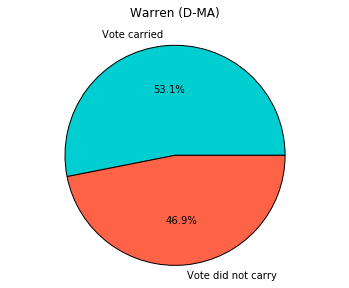

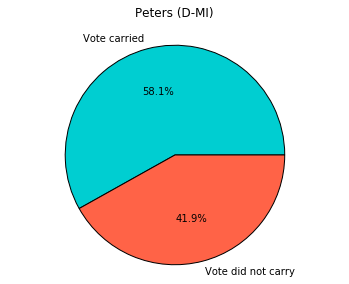

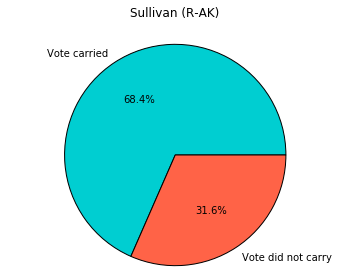

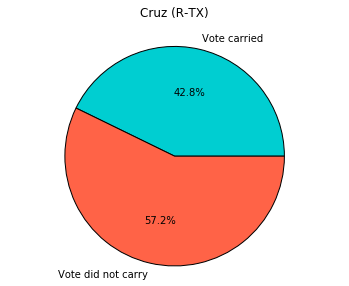

In [21]:
def senator_effectiveness(senator):
    #counts the number of times a senator's vote predicted the outcome of the vote, ie the senator's vote was successful
    count = 0
    for i in range(0, len(df.voteResult)):
        if df[senator][i] == 'Yea' and any(word in df.voteResult[i] for word in ['Agreed to', 'Confirmed', 'Passed', 'Overridden']):
            count += 1
        elif df[senator][i] == 'Nay' and any(word in df.voteResult[i] for word in ['Rejected', 'Failed', 'Sustained']):
            count += 1
    return float(count)/len(df.voteResult)  #percentage of times vote carried

senators = ['Warren (D-MA)', 'Peters (D-MI)', 'Sullivan (R-AK)', 'Cruz (R-TX)']
labels = 'Vote carried', 'Vote did not carry'
colors = ['darkturquoise', 'tomato']

for senator in senators:
    plt.pie([senator_effectiveness(senator)*100, 100 - senator_effectiveness(senator)*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(senator,  y=1.1)
    plt.show()

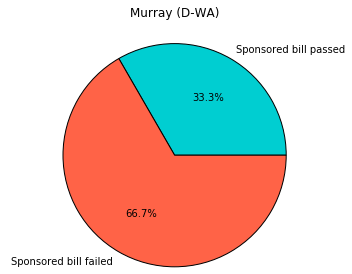

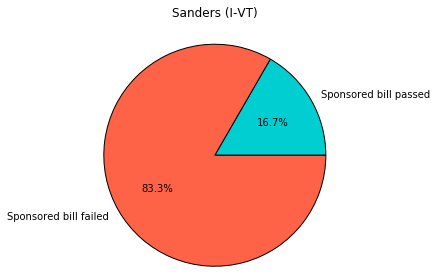

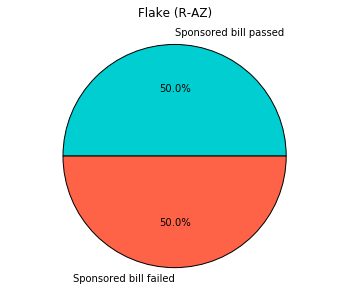

In [106]:
only_bills = df[df['voteResult'].isin(['Amendment Rejected', 'Amendment Agreed to', 'Bill Passed', 'Bill Defeated', 
                          'Concurrent Resolution Agreed to', 'Concurrent Resolution Rejected', 
                          'Joint Resolution Passed', 'Joint Resolution Defeated'])].reset_index()

def sponsor_effectiveness(senator):
    sponsored_bills = only_bills[only_bills.sponsor == senator].reset_index()
    count = 0
    for i in range(0, len(sponsored_bills.voteResult)):
        if any(word in sponsored_bills.voteResult[i] for word in ['Agreed to', 'Passed']):
            count += 1
    if len(sponsored_bills.voteResult):
        return float(count) / len(sponsored_bills.voteResult)
    else:
        return None

senators = ['Murray (D-WA)', 'Sanders (I-VT)', 'Flake (R-AZ)']
labels = 'Sponsored bill passed', 'Sponsored bill failed'
colors = ['darkturquoise', 'tomato']

for senator in senators:
    percent_passed = sponsor_effectiveness(senator)
    if percent_passed != None:        
        plt.pie([percent_passed*100, 100 - percent_passed*100],
                labels=labels, colors=colors, autopct='%1.1f%%')
        plt.axis('equal')
        plt.title(senator,  y=1.1)
        plt.show()
    else:
        print senator, "sponsored no bills during this session of Congress"

In [11]:
sponsors_bills_passed = []
no_sponsors = []
sponsors_bills_failed = []
for key in percent_missed_votes:
    if sponsor_effectiveness(key) != 0 and sponsor_effectiveness(key) != None:
        sponsors_bills_passed.append(key)
    elif sponsor_effectiveness(key) == None:
        no_sponsors.append(key)
    elif sponsor_effectiveness(key) == 0:
        sponsors_bills_failed.append(key)
print "The number of senators who sponsored legislation that passed the senate is", len(sponsors_bills_passed)
print "The number of senators who sponsored no legislation in the senate is", len(no_sponsors)
print "The number of senators who sponsored legislation that failed in the senate is", len(sponsors_bills_failed)

The number of senators who sponsored legislation that passed the senate is 47
The number of senators who sponsored no legislation in the senate is 30
The number of senators who sponsored legislation that failed in the senate is 23


In [12]:
senators = df.ix[:,0:100]
dems = [col for col in senators.columns if col.split()[1][1] == 'D']
reps = [col for col in senators.columns if col.split()[1][1] == 'R']
independents = [col for col in senators.columns if col.split()[1][1] == 'I']

def avg_missed_votes(sen_list):
    tot = 0
    for senator in sen_list:
        tot += percent_missed_votes[senator]
    return tot / len(sen_list)

print "On average, Democrats missed", format(avg_missed_votes(dems) * 100, '.2f'), "percent of votes"
print "On average, Republicans missed", format(avg_missed_votes(reps)*100, '.2f'), "percent of votes"
#could make a bar graph instead of the worst senators by party

On average, Democrats missed 1.82 percent of votes
On average, Republicans missed 3.58 percent of votes


In [10]:
def avg_senator_effectiveness(sen_list):
    tot = 0
    for senator in sen_list:
        tot += senator_effectiveness(senator)
    return tot / len(sen_list)

print "On average, Democrat votes carried", format(avg_senator_effectiveness(dems) * 100, '.2f'), "percent of the time"
print "On average, Republican votes carried", format(avg_senator_effectiveness(reps) * 100, '.2f'), "percent of the time"

On average, Democrat votes carried 58.41 percent of the time
On average, Republican votes carried 68.73 percent of the time


In [13]:
def avg_sponsor_effectiveness(sen_list):
    tot = 0
    for senator in sen_list:
        percentage_passed = sponsor_effectiveness(senator)
        if percentage_passed:
            tot += percentage_passed
    return tot / len(sen_list)

print "On average, Dem-sponsored bills pass", format(avg_sponsor_effectiveness(dems)*100, '.2f'), "percent of the time"
print "On average, Rep-sponsored bills pass", format(avg_sponsor_effectiveness(reps)*100, '.2f'), "percent of the time"

On average, Dem-sponsored bills pass 15.76 percent of the time
On average, Rep-sponsored bills pass 44.78 percent of the time


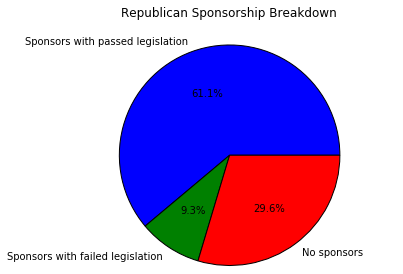

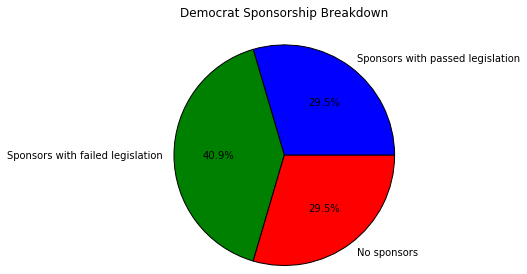

In [14]:
def sponsor_breakdown(sen_list, title):
    bills_passed = 0
    bills_failed = 0
    no_sponsors = 0
    for senator in sen_list:
        percentage_passed = sponsor_effectiveness(senator)
        if percentage_passed:
            bills_passed += 1
        elif percentage_passed == 0:
            bills_failed += 1
        else:
            no_sponsors += 1
    res = [float(bills_passed)/len(sen_list), float(bills_failed)/len(sen_list), float(no_sponsors)/len(sen_list)]
    plt.pie([res[0]*100, res[1]*100, res[2]*100],
            labels=['Sponsors with passed legislation', 'Sponsors with failed legislation', 'No sponsors'],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(title,  y=1.1)
    plt.show()
    return

sponsor_breakdown(reps, 'Republican Sponsorship Breakdown')
sponsor_breakdown(dems, 'Democrat Sponsorship Breakdown')

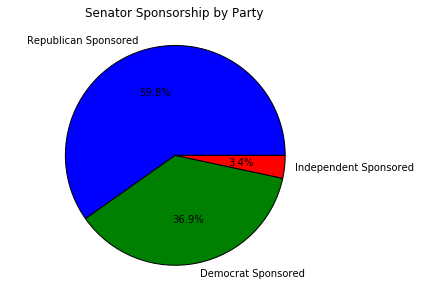

In [15]:
rep_count = 0
dem_count = 0
ind_count = 0
for sponsor in only_bills.sponsor:
    if sponsor.split()[1][1] == 'R':
        rep_count += 1
    elif sponsor.split()[1][1] == 'D':
        dem_count += 1
    elif sponsor.split()[1][1] == 'I':
        ind_count += 1
res = [float(rep_count)/len(only_bills), float(dem_count)/len(only_bills), float(ind_count)/len(only_bills)]
plt.pie([res[0]*100, res[1]*100, res[2]*100],
        labels=['Republican Sponsored', 'Democrat Sponsored', 'Independent Sponsored'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Senator Sponsorship by Party',  y=1.1)
plt.show()

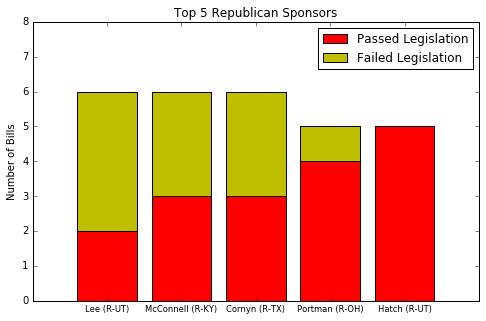

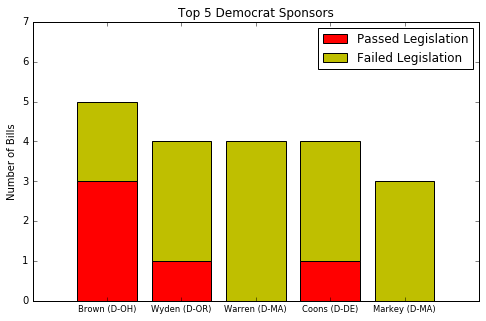

In [104]:
sponsored_no = {}
for sponsor in only_bills.sponsor:
    if sponsor in sponsored_no:
        sponsored_no[sponsor] += 1
    else:
        sponsored_no[sponsor] = 1

sorted_sponsored_no = sorted(sponsored_no.items(), key=operator.itemgetter(1))[::-1]
rep_sponsors = [sponsor for sponsor in sorted_sponsored_no if sponsor[0].split()[1][1] == 'R']
dem_sponsors = [sponsor for sponsor in sorted_sponsored_no if sponsor[0].split()[1][1] == 'D']

def top_sponsor_effectiveness(sponsor_list, title):
    sen_list = [sponsor[0] for sponsor in sponsor_list[0:5]]
    tot_bills = [sponsor[1] for sponsor in sponsor_list[0:5]]
    successes = []
    fails = []
    for sponsor in sen_list:
        success = 0
        fail = 0
        for result in only_bills[only_bills.sponsor == sponsor].voteResult:
            if any(word in result for word in ['Agreed to', 'Passed']):
                success += 1
            elif any(word in result for word in ['Rejected', 'Failed']):
                fail += 1
        if success + fail != len(only_bills[only_bills.sponsor == sponsor]):
            print "Aw man something is blazed"
        else:
            successes.append(success)
            fails.append(fail)
    fig = plt.figure(figsize=(8,5))
    p1 = plt.bar(range(len(successes)), successes, align='center', color='r')
    p2 = plt.bar(range(len(fails)), fails, align='center', color='y', bottom=successes)
    plt.axis([-1, len(sen_list), 0, max(tot_bills)+2])
    plt.xticks(range(len(sen_list)), sen_list, size='small')
    plt.title(title)
    plt.ylabel('Number of Bills')
    plt.legend((p1[0], p2[0]), ('Passed Legislation', 'Failed Legislation'))
    plt.show()
    return 

top_sponsor_effectiveness(rep_sponsors, 'Top 5 Republican Sponsors')
top_sponsor_effectiveness(dem_sponsors, 'Top 5 Democrat Sponsors')

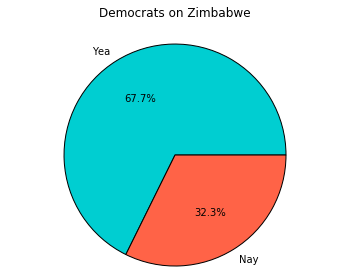

In [118]:
def party_votes_on_subject(sen_list, subject, party):
    tot = 0
    for senator in sen_list:
        tot += votes_on_subject(senator, subject)
    avg_voted_yea = tot / len(sen_list)
    labels = 'Yea', 'Nay'
    colors = ['darkturquoise', 'tomato']
    plt.pie([avg_voted_yea*100, 100 - avg_voted_yea*100],
            labels=labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(party + " on " + subject, y=1.1)
    plt.show()
    return

party_votes_on_subject(dems, 'Zimbabwe', 'Democrats')    